In [1]:
import cv2 
import pandas as pd

path = "/Users/rohith/Documents/Datasets/sign-language-mnist/sign_mnist_train.csv"
df = pd.read_csv(path)

In [2]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [3]:
import numpy as np

image = []
array = df.values.tolist()
test = array[0][1:]
test = np.array(test)

In [4]:
test = test.reshape(28,28)

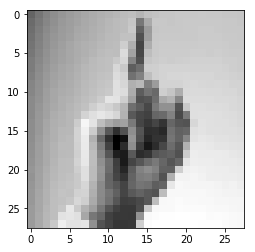

In [7]:
import matplotlib.pyplot as plt 

plt.imshow(test, cmap='gray')

In [8]:
temp = df.values.tolist()

In [19]:
temp = np.array(temp)

In [20]:
labels = temp[:,0]

In [22]:
s = set()
for l in labels:
    s.add(l)

In [30]:
print(s)
print(len(s))

set([0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])
24


In [24]:
data = df.values.tolist()

data = np.array(data)
x_train = data[:,1:]
y_train = data[:,0]

In [29]:
print(x_train.shape)

(27455, 28, 28)


In [33]:
x_train = x_train.reshape(27455,28,28,1)

In [42]:
print(y_train)

[ 3  6  2 ..., 18 17 23]


In [43]:
for i in range(len(y_train)):
    if(y_train[i] > 8):
        y_train[i] -= 1

In [44]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, 24)

In [45]:
print(y_train.shape)

(27455, 24)


In [47]:
print(y_train[1])

[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.]


In [64]:
import keras 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, BatchNormalization, Dropout, MaxPooling2D, Flatten

model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(256, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(512, (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(24, activation = 'softmax'))

In [65]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics = ['accuracy'])

In [66]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 2, 2, 512)         1180160   
__________

In [67]:
model.fit(x_train, y_train, epochs = 10, batch_size = 10, verbose = 1)

Epoch 1/10
27455/27455 [==============================] - 487s 18ms/step - loss: 1.0658 - acc: 0.6653
Epoch 2/10
27455/27455 [==============================] - 496s 18ms/step - loss: 0.1519 - acc: 0.9502
Epoch 3/10
27455/27455 [==============================] - 482s 18ms/step - loss: 0.0661 - acc: 0.9794
Epoch 4/10
27455/27455 [==============================] - 508s 18ms/step - loss: 0.0547 - acc: 0.9837
Epoch 5/10
27455/27455 [==============================] - 484s 18ms/step - loss: 0.0351 - acc: 0.9899
Epoch 6/10
27455/27455 [==============================] - 488s 18ms/step - loss: 0.0331 - acc: 0.9919
Epoch 7/10
27455/27455 [==============================] - 533s 19ms/step - loss: 0.0328 - acc: 0.9911
Epoch 8/10
27455/27455 [==============================] - 482s 18ms/step - loss: 0.0184 - acc: 0.9951
Epoch 9/10
27455/27455 [==============================] - 481s 18ms/step - loss: 0.0253 - acc: 0.9939
Epoch 10/10
27455/27455 [==============================] - 504s 18ms/step - loss: 

In [68]:
model.save('/Users/rohith/Documents/Datasets/sign-language-mnist/sign_lang.hd5')

In [69]:
path = "/Users/rohith/Documents/Datasets/sign-language-mnist/sign_mnist_test.csv"
df_test = pd.read_csv(path)

In [70]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [79]:
data = df_test.values.tolist()
data = np.array(data)

In [80]:
y_test = data[:,0]

In [81]:
x_test = data[:,1:]

In [82]:
print(x_test.shape)

(7172, 784)


In [83]:
x_test = x_test.reshape(7172, 28, 28, 1)

In [84]:
for i in range(len(y_test)):
    if(y_test[i] > 8):
        y_test[i] -= 1

In [85]:
y_test = to_categorical(y_test, 24)

In [86]:
print(y_test.shape)

(7172, 24)


In [87]:
model.evaluate(x_test, y_test, verbose = 1)

7172/7172 [==============================] - 23s 3ms/step


[0.6977065472271462, 0.89891243725599557]